# Demo for the masking threshold in quiet
**Gerald Schuller, Nov. 2016**

### Input:
Records the input from the selected microphone.

### Output:
Displays various plots:
1. Noise Magnitude Spectrum.
2. Noise signal in the time domain.
3. Hearing Threshold in quiet.

and plays out the noise.

* **Import relevant modules**

In [1]:
from soundfloat import sound
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
import os
import warnings
warnings.filterwarnings('ignore')

* **Defining function for processing and plotting the noise spectrum in dB domain**

In [2]:
def noisefromdBSpectrum(spec,fs):
    #produces noise according to the dB spectrum given in spec
    #Spectrum goes from frequency 0 up to Nyquist frequency

    plt.plot(spec)
    plt.xlabel('DFT subband (lower half)')
    plt.ylabel('dB')
    plt.title('Noise Magnitude Spectrum')
    plt.show()

    specvoltage=10.0**(spec/20.0)

    #produce 40 blocks of sound:
    noise=[]
    for m in range(40):
        #Noise in the range of -1...+1, and Multiply noise with spectrum:
        noisespec=specvoltage*(np.random.rand(len(specvoltage))-0.5)*2

        #make spectrum symmetric for ifft: 
        #trick: Append zeros to fill up negative frequencies in upper half of DFT, 
        #then take real part of inverse transform:
        noisespec=np.concatenate((noisespec, np.zeros(len(noisespec))))
        noise=np.append(noise,np.real(ifft(noisespec,norm='ortho')))

    plt.plot(noise)
    plt.title('Produced Noise Signal in the Time Domain')
    plt.show()
    sound(noise, fs)

* **Running the program with variables defined as below**

In [3]:
if __name__ == '__main__':
    fs=32000 # sampling frequency
    N=1024 #number of subbands

* **Spectrum in dB sound level, 60 dB: speaking level:**

In [4]:
    spec=np.ones(1024)*60.0

* **Convert to range of internal representation: Value 1 or 0 dB is full level,assume full level will result in 60 dB sound level from sound volume level:**

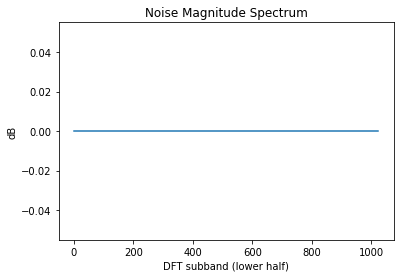

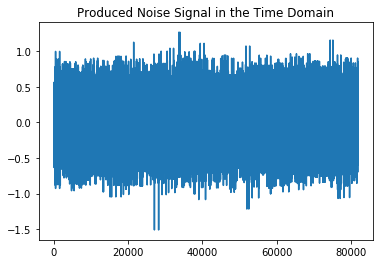

* done


In [5]:
    spec=spec-60.0
    os.system('espeak -ven -s 140 '+'"Now hear white noise with flap spectrum"')
    noisefromdBSpectrum(spec,fs)

* **Masking threshold in quiet approximation, clip it to our maximum level of the internal representation:**

In [6]:
    f=np.linspace(0,fs/2,N)

In [7]:
    LTQ=np.clip((3.64*(f/1000.)**-0.8 -6.5*np.exp(-0.6*(f/1000.-3.3)**2.)+1e-3*((f/1000.)**4.)),-20,60) 

* **Shift dB according to our internal representation:**

In [8]:
    LTQ=LTQ-60

* **Play back noise shaped like the masking theshold in quiet:**

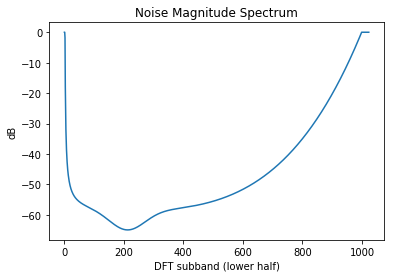

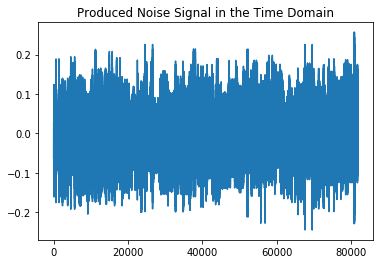

* done


In [9]:
    os.system('espeak -ven -s 140 '+'"Now hear noise shaped like the trehsold in quiet approximation"')
    noisefromdBSpectrum(LTQ,fs)